## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [ ]:
dataset = pd.read_csv('Emotion Dataset (English Text).csv', index_col=False)

In [ ]:
dataset.head()

,serial,text,label
0,0,i didnt feel humiliated,sadness
1,1,i can go from feeling so hopeless to so damned...,sadness
2,2,im grabbing a minute to post i feel greedy wrong,anger
3,3,i am ever feeling nostalgic about the fireplac...,love
4,4,i am feeling grouchy,anger


## Exploratory Data Analysis

In [ ]:
#Columns/features in data
dataset.columns

Index(['serial', 'text', 'label'], dtype='object')

In [ ]:
# length of the dataset
print('length of data is', len(dataset))

length of data is 20000


In [ ]:
# shape of data
dataset.shape

(20000, 3)

In [ ]:
# data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   serial  20000 non-null  int64 
 1   text    20000 non-null  object
 2   label   20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.9+ KB


In [ ]:
#Datatypes of all columns
dataset.dtypes

serial     int64
text      object
label     object
dtype: object

In [ ]:
#Rows and columns in the dataset
print('Count of columns in the data is:  ', len(dataset.columns))
print('Count of rows in the data is:  ', len(dataset))

Count of columns in the data is:   3
Count of rows in the data is:   20000


In [ ]:
#Check unique label values
dataset['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
#Check the number of label values
dataset['label'].nunique()

6

<Axes: xlabel='label', ylabel='count'>

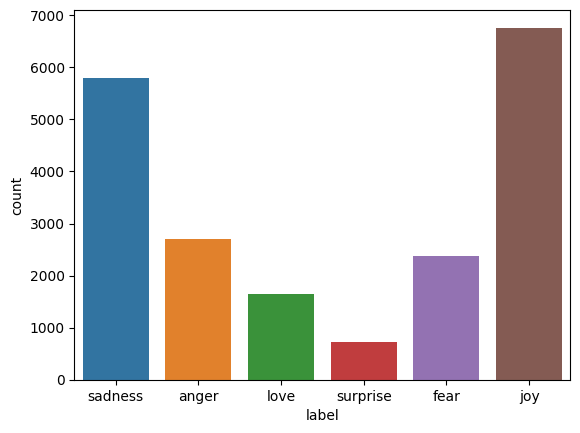

In [ ]:
import seaborn as sns
sns.countplot(x='label', data=dataset)

## Data cleaning

In [ ]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import neattext.functions as nfx

In [ ]:
dataset['clean_text'] = dataset['text'].apply(nfx.remove_stopwords)  # removing stopwords
dataset['clean_text'] = dataset['clean_text'].apply(nfx.remove_userhandles)  # removing user handles
dataset['clean_text'] = dataset['clean_text'].apply(nfx.remove_punctuations)  # removing punctuations
dataset['clean_text'] = dataset['clean_text'].apply(nfx.remove_special_characters)  # removing special characters
dataset['clean_text'] = dataset['clean_text'].str.lower()  # converting text to lower case

In [ ]:
dataset.head()

,serial,text,label,clean_text
0,0,i didnt feel humiliated,sadness,didnt feel humiliated
1,1,i can go from feeling so hopeless to so damned...,sadness,feeling hopeless damned hopeful cares awake
2,2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,3,i am ever feeling nostalgic about the fireplac...,love,feeling nostalgic fireplace know property
4,4,i am feeling grouchy,anger,feeling grouchy


### Stemming and Lemmatizing the clean_text

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import PorterStemmer, LancasterStemmer, RegexpStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Choices for pos parameter in the lemmatizer**

*   'n' --> nouns (NN, NNS, NNP, NNPS)
*   'v' --> verbs (VB, VBD, VBG, VBN, VBP, VBZ)
*   'a' --> adjectives (JJ, JJR, JJS)
*   'r' --> adverbs (RB, RBR, RBS)

In [ ]:
# finds nltk tag for each word in a sentence
def lemmatizer_tag_finder(sentence):
  tokens = word_tokenize(sentence)
  tag_list = dict(nltk.pos_tag(tokens))

  for tag in tag_list:
    if tag_list[tag].startswith('NN'):
      tag_list[tag] = 'n'
    elif tag_list[tag].startswith('VB'):
      tag_list[tag] = 'v'
    elif tag_list[tag].startswith('JJ'):
      tag_list[tag] = 'a'
    elif tag_list[tag].startswith('RB'):
      tag_list[tag] = 'r'
    else:
      tag_list[tag] = 'others'

  return tag_list

In [ ]:
# returns a lemmatized sentence
def sentence_lemmatizer(sentence):
  words_and_tags = lemmatizer_tag_finder(sentence)
  lemmatized_sentence = []
  lemmatizer = WordNetLemmatizer()

  for word in words_and_tags:
    if words_and_tags[word] == 'others':
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word, pos=words_and_tags[word]))

  return " ".join(lemmatized_sentence)

In [ ]:
pd.options.mode.chained_assignment = None

length = len(dataset['clean_text'])

for index in range(0, length):
  sentence = dataset['clean_text'][index]
  dataset['clean_text'][index] = sentence_lemmatizer(sentence)

In [ ]:
dataset.head()

,serial,text,label,clean_text
0,0,i didnt feel humiliated,sadness,didnt feel humiliate
1,1,i can go from feeling so hopeless to so damned...,sadness,feel hopeless damn hopeful care awake
2,2,im grabbing a minute to post i feel greedy wrong,anger,im grab minute post feel greedy wrong
3,3,i am ever feeling nostalgic about the fireplac...,love,feel nostalgic fireplace know property
4,4,i am feeling grouchy,anger,feel grouchy


### Correcting spell of words in the clean_text

In [ ]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
from autocorrect import Speller

In [ ]:
# create an instance of Speller
spell = Speller(lang='en')

# define function to reduce and correct text
def reduce_and_correct(text):
    words = text.split()
    reduced_words = [spell(word) for word in words]
    reduced_text = ' '.join(reduced_words)
    return reduced_text

In [ ]:
# apply function to input column and create output column
dataset['clean_text'] = dataset['clean_text'].apply(reduce_and_correct)

In [ ]:
dataset.head()

,serial,text,label,clean_text
0,0,i didnt feel humiliated,sadness,didnt feel humiliate
1,1,i can go from feeling so hopeless to so damned...,sadness,feel hopeless damn hopeful care awake
2,2,im grabbing a minute to post i feel greedy wrong,anger,im grab minute post feel greedy wrong
3,3,i am ever feeling nostalgic about the fireplac...,love,feel nostalgic fireplace know property
4,4,i am feeling grouchy,anger,feel grouchy


## Ploting cloud of words for sad and joy text

In [ ]:
from wordcloud import WordCloud

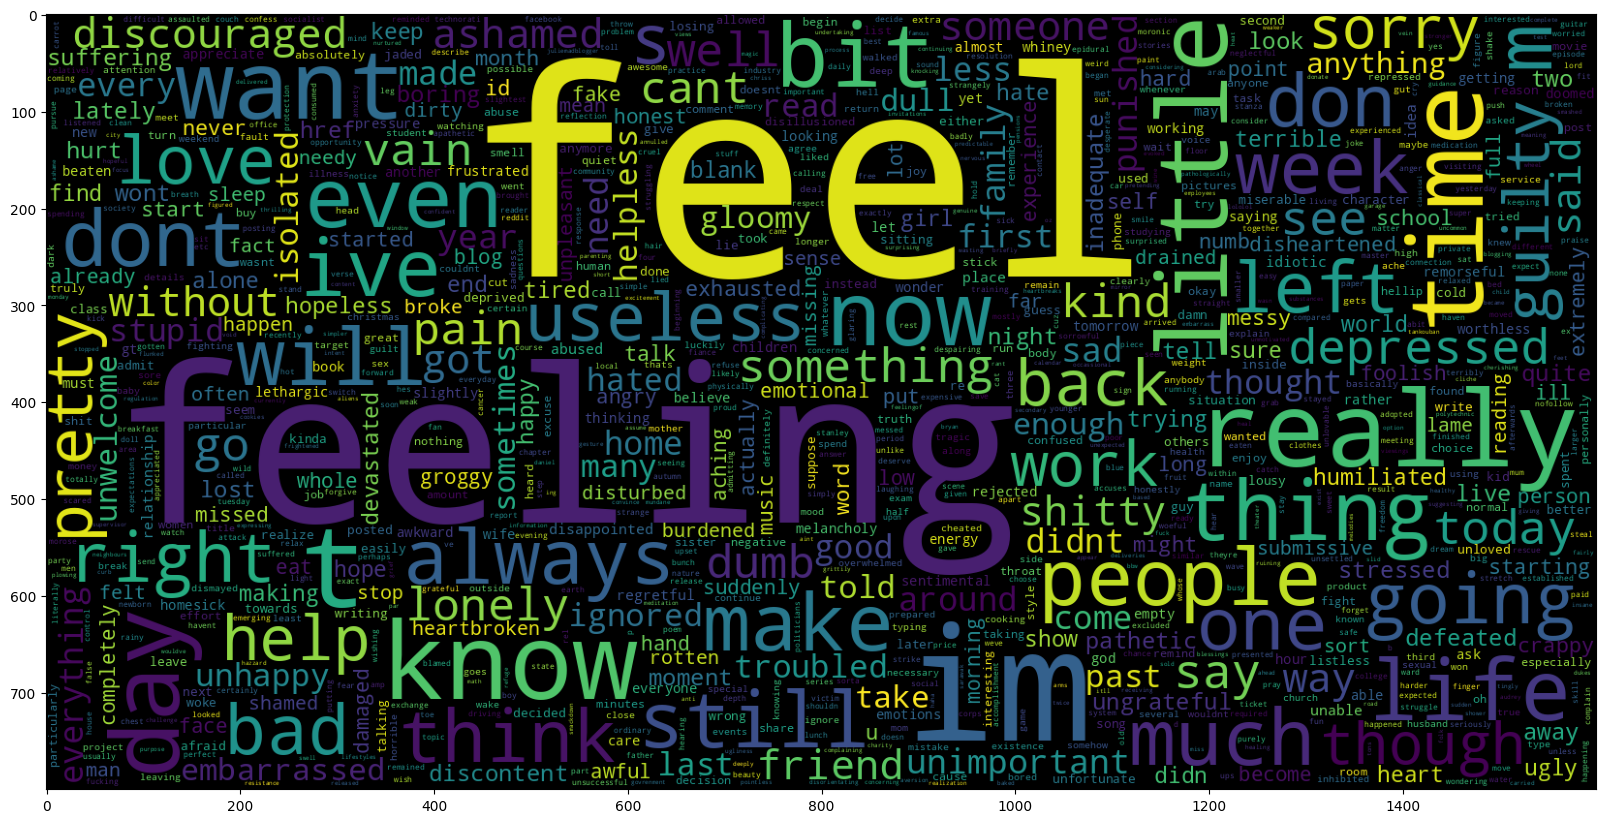

In [ ]:
# getting sad text for cloud of words
data_sadness = dataset[dataset['label'] == 'sadness']
data_sadness = data_sadness['text'][5000:]

#Plot a cloud of words for sad text
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_sadness))
plt.figure(figsize = (20,20))
plt.imshow(wc)

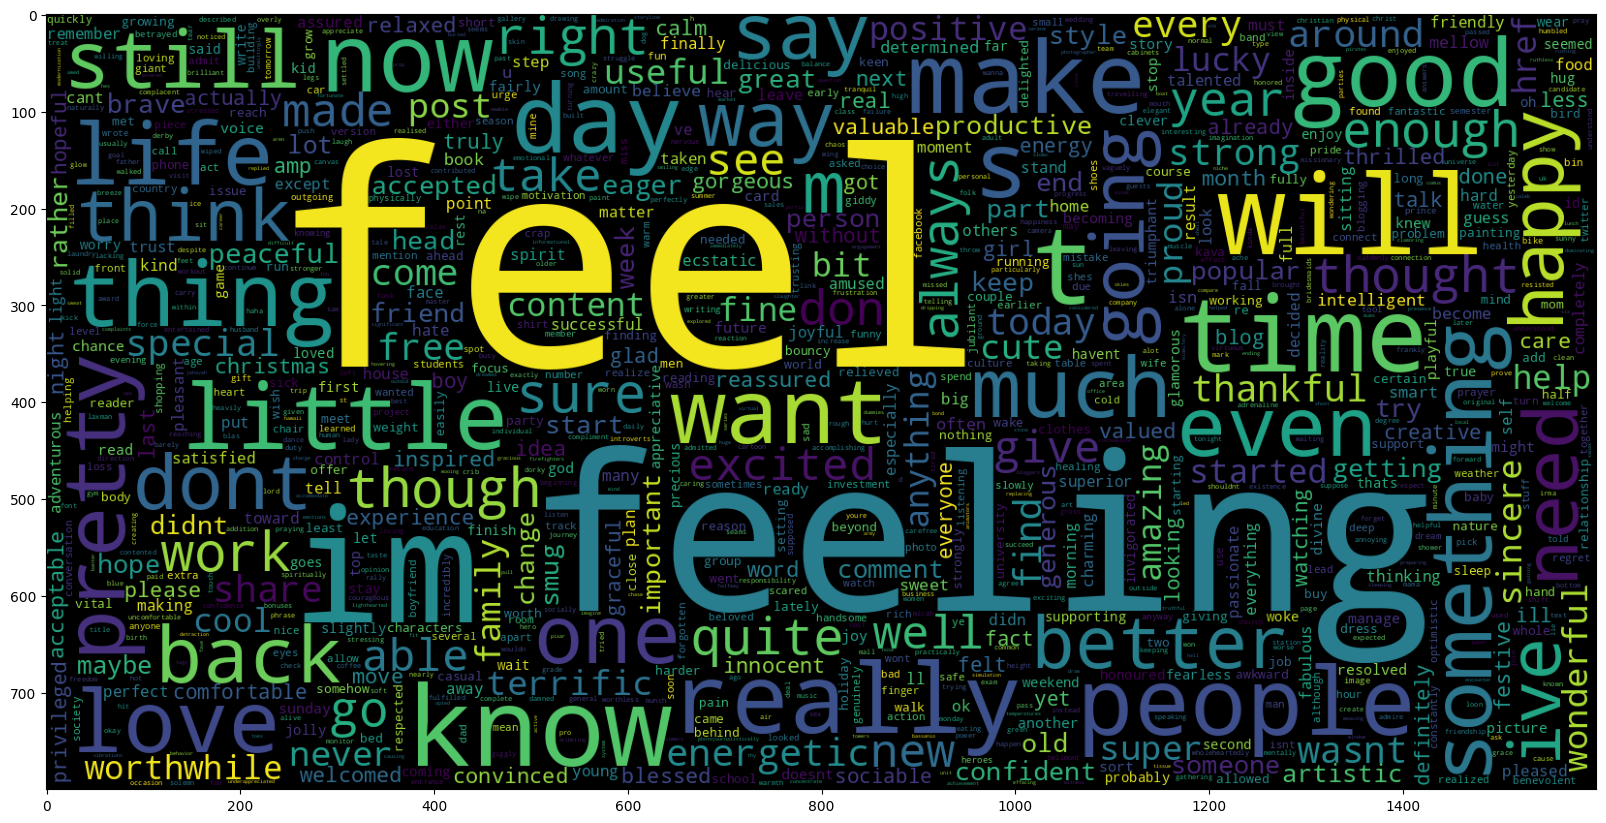

In [ ]:
# getting sad text for cloud of words
data_joy = dataset[dataset['label'] == 'joy']
data_joy = data_joy['text'][6000:]

#Plot a cloud of words for sad text
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_joy))
plt.figure(figsize = (20,20))
plt.imshow(wc)

## Feature extraction

In [ ]:
xfeatures = dataset['clean_text']
ylabels = dataset['label']

In [ ]:
xfeatures.head()

0                      didnt feel humiliate
1     feel hopeless damn hopeful care awake
2     im grab minute post feel greedy wrong
3    feel nostalgic fireplace know property
4                              feel grouchy
Name: clean_text, dtype: object

In [ ]:
ylabels

0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
19995    sadness
19996        joy
19997        joy
19998        joy
19999        joy
Name: label, Length: 20000, dtype: object

### Spliting data for pipeline

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(xfeatures, ylabels, test_size=0.2, random_state = 0)

### Converting text into vectors

In [ ]:
# vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
xfeatures = vectorizer.fit_transform(xfeatures)

In [ ]:
print(xfeatures.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Spliting data into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xfeatures, ylabels, test_size=0.2, random_state = 0)

In [ ]:
type(x_train)

scipy.sparse._csr.csr_matrix

## Building models

In [ ]:
# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score

In [ ]:
# training all the models on the training set
from pandas.core.generic import RandomState
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000),
    'Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Dicision Tree': DecisionTreeClassifier(),
    'SVM': SVC(kernel='rbf', random_state=0),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
}

for model_index in models:
  # training each model on training set
  model = models[model_index]
  model.fit(x_train, y_train)

  # make prediction on training set
  y_train_pred = model.predict(x_train)

  # make prediction on test set
  y_pred = model.predict(x_test)

  print('------------------------------------')

  # training set performance
  print('Training set performance for model ', model_index, ' :')
  print('   Accuracy score : ', accuracy_score(y_train, y_train_pred))
  print('   f1 score       : ', f1_score(y_train, y_train_pred, average='weighted'))
  print('   precision score: ', precision_score(y_train, y_train_pred, average='weighted'))
  print('   recall score   : ', recall_score(y_train, y_train_pred, average='weighted'))

  print('\n')

  # training set performance
  print('Test set performance for model ', model_index, ' :')
  print('   Accuracy score : ', accuracy_score(y_test, y_pred))
  print('   f1 score       : ', f1_score(y_test, y_pred, average='weighted'))
  print('   precision score: ', precision_score(y_test, y_pred, average='weighted'))
  print('   recall score   : ', recall_score(y_test, y_pred, average='weighted'))

------------------------------------
Training set performance for model  Logistic Regression  :
   Accuracy score :  0.9235625
   f1 score       :  0.9248116717408699
   precision score:  0.9314128717683067
   recall score   :  0.9235625


Test set performance for model  Logistic Regression  :
   Accuracy score :  0.86175
   f1 score       :  0.8641834508263306
   precision score:  0.871167938032817
   recall score   :  0.86175
------------------------------------
Training set performance for model  Naive Bayes  :
   Accuracy score :  0.7520625
   f1 score       :  0.7089220182085277
   precision score:  0.8124671399554523
   recall score   :  0.7520625


Test set performance for model  Naive Bayes  :
   Accuracy score :  0.68375
   f1 score       :  0.6245380377832039
   precision score:  0.7625615858475355
   recall score   :  0.68375
------------------------------------
Training set performance for model  Bernoulli Naive Bayes  :
   Accuracy score :  0.775125
   f1 score       :  0.

In [ ]:
# getting the trained model from the models dictionary
model =  models['Logistic Regression']

# making predictions
predictions = model.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       anger       0.82      0.88      0.85       555
        fear       0.85      0.85      0.85       478
         joy       0.92      0.86      0.89      1362
        love       0.69      0.86      0.77       333
     sadness       0.93      0.86      0.89      1131
    surprise       0.64      0.87      0.73       141

    accuracy                           0.86      4000
   macro avg       0.81      0.86      0.83      4000
weighted avg       0.87      0.86      0.86      4000



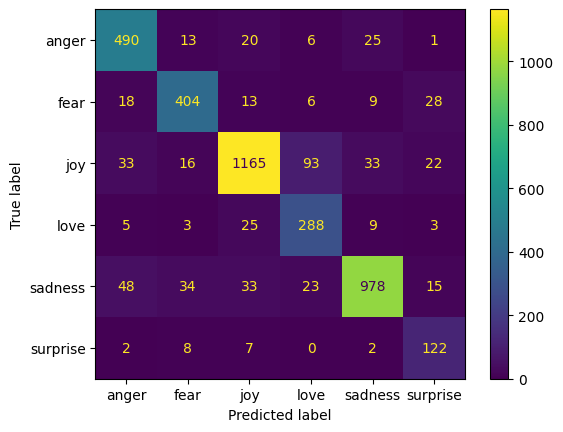

In [ ]:
# setting confusion matrix parameters
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# showing confusion matrix
disp.plot()
plt.show()

In [ ]:
from yellowbrick.classifier import ROCAUC

categories = {
    'sadness': 0, 
    'anger': 1, 
    'love': 2, 
    'surprise': 3, 
    'fear': 4, 
    'joy': 5
}

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder=categories)
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()

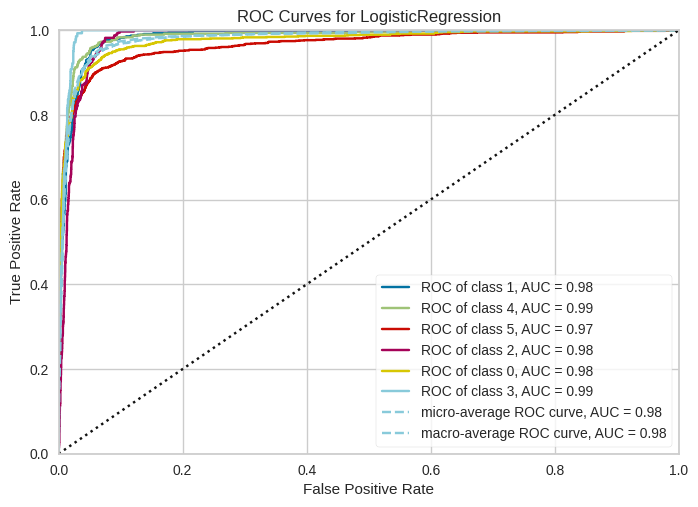

In [ ]:
plot_ROC_curve(model, x_train, y_train, x_test, y_test)

## Building pipeline using best model based on the accuracy

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe_lr = Pipeline(steps = [
    ('vectorizer', TfidfVectorizer()), 
    ('lr', LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000))
])

In [ ]:
pipe_lr.fit(x_train_p, y_train_p)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=10000))])

In [ ]:
pipe_lr.score(x_test_p, y_test_p)

0.86325

In [ ]:
text = input("Enter a sentence: ")
print("The emotion detected from the sentence is: ", pipe_lr.predict([text])[0])

Enter a sentence: We have finished our project successfully.
The emotion detected from the sentence is:  joy
